### ASTR 3300/ PHYS 5300-003: Astrostatistics
***N. Pol***
___

# Homework 7
### Due: Friday, Apr. 4, at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [1]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [85]:
### imports
import numpy as np
import matplotlib.pyplot as plt

In [87]:
### load data
data = np.load('./hw_data/hw7_data_1.npy')
print(data)

[[ 7.8948247   2.63234381 80.4253773   1.87575433]
 [ 0.52366744  0.51621304 47.10411881  2.91421645]
 [ 4.36807264  4.49797669 36.40116352  1.85647292]
 ...
 [ 1.5358578   8.15125245 -5.7198948   2.92883229]
 [ 8.91084693  1.52367531 86.7604311   2.98858927]
 [ 8.33808026  8.49856086 27.3122781   2.7975563 ]]


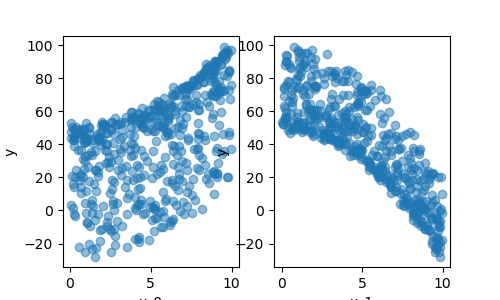

In [170]:
### variables
X = data[:, :2]      # Features (2D)
y = data[:, 2]       # Targets
yerr = data[:, 3]    # Uncertainties

### plot
fig, axs = plt.subplots(1, 2, figsize=(5, 3))

axs[0].scatter(X[:, 0], y, alpha=0.5)
axs[0].set_xlabel('x_0')
axs[0].set_ylabel('y')

axs[1].scatter(X[:, 1], y, alpha=0.5)
axs[1].set_xlabel('x_1')
axs[1].set_ylabel('y')

plt.show()

In [107]:
### 2
from astroML.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y, yerr)

#print(linreg.intercept_) # for some reason .intercept_ doesn't work...
print(linreg.coef_)


[57.10102323  4.94873016 -8.30023407]


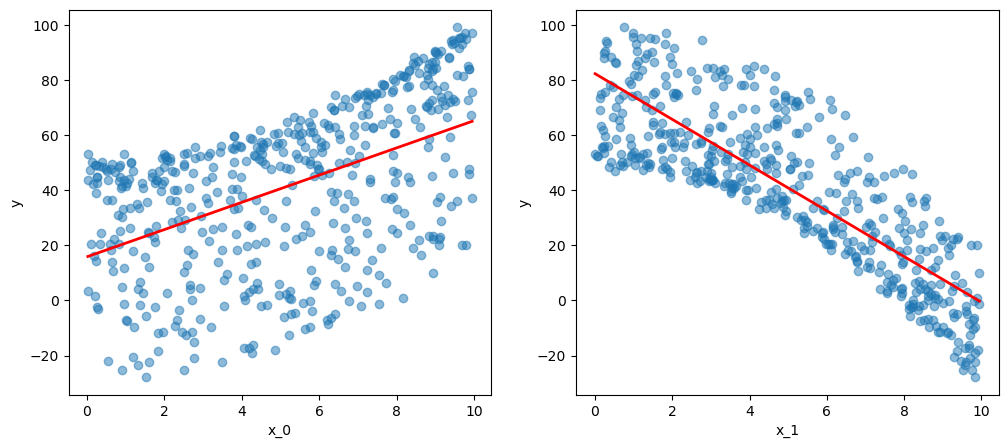

In [109]:
### grid
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)

### best-fit
X0_fixed = np.column_stack([x0, np.full_like(x0, X[:, 1].mean())])
X1_fixed = np.column_stack([np.full_like(x1, X[:, 0].mean()), x1])

y0_pred = linreg.predict(X0_fixed)
y1_pred = linreg.predict(X1_fixed)

# 2-panel plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X[:, 0], y, alpha=0.5)
axs[0].set_xlabel('x_0')
axs[0].set_ylabel('y')
axs[0].plot(x0, y0_pred, color='r', lw=2)

axs[1].scatter(X[:, 1], y, alpha=0.5)
axs[1].set_xlabel('x_1')
axs[1].set_ylabel('y')
axs[1].plot(x1, y1_pred, color='r', lw=2)

plt.show()

### set up for next cell
Xgrid0, Xgrid1 = np.meshgrid(x0, x1)
Xgrid = np.column_stack([Xgrid0.ravel(), Xgrid1.ravel()])
Z_pred = linreg.predict(Xgrid).reshape(Xgrid0.shape)

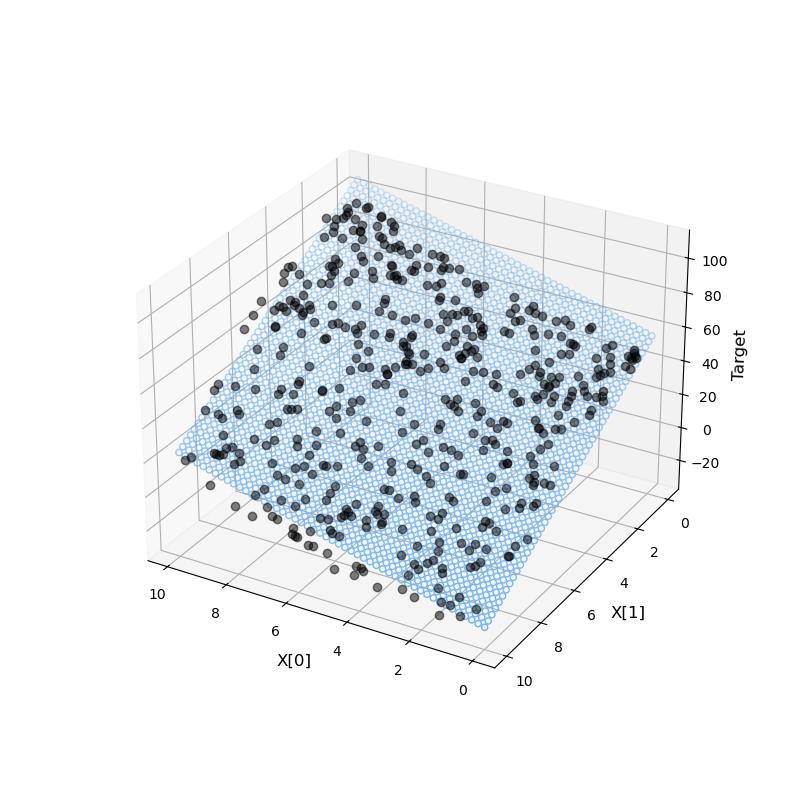

In [119]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid0.flatten(), Xgrid1.flatten(), Z_pred.flatten(), 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#plt.show()


# plot is not showing... no errors just "Error displaying widget"
# not sure what's wrong
# Also tried commentting out '%matplotlib widget' but doesn't work
# I'll move on for now

In [117]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [155]:
### imports
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


In [163]:
### parameters
ridge_params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0],
                'solver': ['svd', 'lsqr']}

ridge = Ridge()
gs = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error')
gs.fit(X, y, sample_weight=1/yerr**2)

print(gs.best_params_)
print(gs.best_score_)

### fitting
best_ridge = Ridge(**gs.best_params_)
best_ridge.fit(X, y, sample_weight=1/yerr**2)

Z_ridge_pred = best_ridge.predict(Xgrid).reshape(Xgrid0.shape)


{'alpha': 1.0, 'solver': 'svd'}
-59.17442154196483


In [131]:
ridgecv = RidgeCV(alphas=ridge_params['alpha'], scoring='neg_mean_squared_error')
ridgecv.fit(X, y, sample_weight=1/yerr**2)

print("RidgeCV alpha_:", ridgecv.alpha_)

RidgeCV alpha_: 0.05


In [165]:
# 5
gpr = GaussianProcessRegressor(kernel=RBF(), alpha=(yerr/y)**2)
gpr.fit(X, y)

Z_gpr_pred = gpr.predict(Xgrid).reshape(Xgrid0.shape)

print("5: ", Z_gpr_pred)

# 6
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X, y)

Z_poly_pred = poly.predict(Xgrid).reshape(Xgrid0.shape)

print("6: ", Z_poly_pred)
print("Coefficients:", poly.named_steps['linearregression'].coef_)

5:  [[ 27.96111857  37.09516788  36.63988402 ...  60.95487863  47.08861306
   31.73582882]
 [ 35.88191585  46.16575903  46.52089286 ...  83.10120503  68.45060214
   49.84960228]
 [ 42.16465738  48.93601211  49.06290514 ...  96.48233759  84.59190871
   67.76865542]
 ...
 [ -6.41100582 -12.05022848 -18.51901014 ...  17.43348483  15.05280687
   12.53436426]
 [ -5.44029928 -10.38935796 -16.26208086 ...  22.04127566  19.89707142
   16.23254966]
 [ -3.62414643  -7.08957846 -11.45422902 ...  20.27967745  19.95703916
   16.83661135]]
6:  [[ 50.04661528  50.13273296  50.25036346 ...  94.01772509  95.89649575
   97.81345554]
 [ 50.02358047  50.1088789   50.22610026 ...  94.31420642  96.2057459
   98.13563737]
 [ 49.92974737  50.01401493  50.1306016  ...  94.51489806  96.41834062
   98.36028409]
 ...
 [-23.61222633 -23.51553715 -23.38310504 ...  21.41925032  23.24012468
   25.09179729]
 [-26.96684583 -26.86239932 -26.72245391 ...  18.08013863  19.8916146
   21.73339754]
 [-30.41573149 -30.3029339

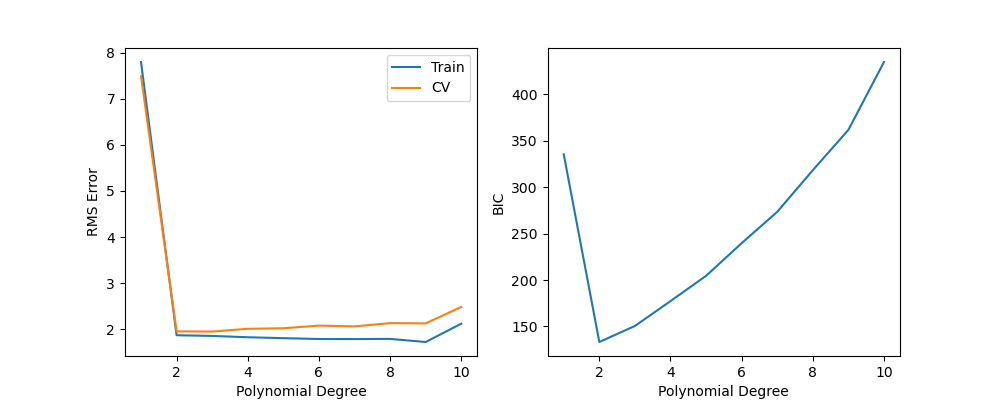

In [173]:
# First split
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(
    X, y, yerr, test_size=0.2, random_state=42)

# Cross-validation split from training set
X_train2, X_cv, y_train2, y_cv, yerr_train2, yerr_cv = train_test_split(
    X_train, y_train, yerr_train, test_size=0.2, random_state=42)

rms_train = []
rms_cv = []
BIC = []

for deg in range(1, 11):
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X_train2, y_train2)
    
    y_pred_train = model.predict(X_train2)
    y_pred_cv = model.predict(X_cv)
    
    mse_train = mean_squared_error(y_train2, y_pred_train)
    mse_cv = mean_squared_error(y_cv, y_pred_cv)

    rms_train.append(np.sqrt(mse_train))
    rms_cv.append(np.sqrt(mse_cv))

    ### BIC
    n = len(y_cv)
    k = model.named_steps['linearregression'].coef_.size
    bic = n * np.log(mse_cv) + k * np.log(n)
    BIC.append(bic)

### plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), rms_train, label='Train')
plt.plot(range(1, 11), rms_cv, label='CV')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), BIC)
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC')


plt.show()

In [ ]:
### in general in this hw graphs are not showing up properly...
### they are sometimes showing up but mostly shows
### a message with "loading widget" or "Error displaying widget"
### using the notes and asking gpt if there is any possible errors,
### this would probably be the most I can proceed without looking at the graphs.

<span style="color:red">NP: missing some plots and the answers to #4 and #6. -2 pts</span>